<a href="https://colab.research.google.com/github/MedicalFrank/DE_COVID_19_hackathon/blob/master/impact_of_envornment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# From the University of Delaware Data Science COVID-19 Hack-athon 




I was on the [Impact of ShutDown on Emissions team](https://github.com/UDDSI/COVID19hackathon/tree/master/projects/EnvironmentalTrack/Impact_of_ShutDown_on_Emissions)

Here we read in data from the Department of Natural Resources and Environmental Control (DNREC) Air Quality Monitoring Network and make some basic plots.

The data set was downliaded Tues, May 5

Invalid data was already cleaned and removed

Set up of the python environment and data was read through using pandas

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size" : 16}) # Make readable plots


# -- GGD: note, this filename will have to be changed depending on the location 
#    of the data and where this notebook is being run
fname = '/content/drive/My Drive/udcovid_hack_air_quality/data/dnrec/Air_Quality_valid.csv'

if fname.endswith(".gz"):
  airdata = pd.read_csv('Air_Quality_valid.csv.gz', parse_dates=['Date_Time'], \
                        engine='c', compression='gzip')
else:
  airdata = pd.read_csv(fname, parse_dates=['Date_Time'], engine='c')

Examination of the first few rows

In [0]:
airdata.head()

,Date_Time,CountyCode,STA_StationName,MOT_AIR_ParamCode,MOT_MonitorName,ParamValue,STT_DataStatusCodeText
0,2010-11-15 17:00:00,3,Martin Luther King,42401,SO2 Trace Level,0.006407,_
1,2010-11-15 17:00:00,3,Martin Luther King,42101,CO Trace Level,0.435146,_
2,2010-11-15 17:00:00,3,Martin Luther King,62101,Temp,12.394440,_
3,2010-11-15 17:00:00,3,Martin Luther King,42603,NOX,0.000000,RS232
4,2010-11-15 17:00:00,3,Martin Luther King,44201,Ozone,0.001832,_


In [0]:
airdata[airdata["MOT_MonitorName"] == "NOX"]

,Date_Time,CountyCode,STA_StationName,MOT_AIR_ParamCode,MOT_MonitorName,ParamValue,STT_DataStatusCodeText
3,2010-11-15 17:00:00,3,Martin Luther King,42603,NOX,0.000000,RS232
8,2010-11-15 18:00:00,3,Martin Luther King,42603,NOX,0.000000,RS232
13,2010-11-15 19:00:00,3,Martin Luther King,42603,NOX,0.000000,RS232
18,2010-11-15 20:00:00,3,Martin Luther King,42603,NOX,0.000000,RS232
23,2010-11-15 21:00:00,3,Martin Luther King,42603,NOX,0.000000,RS232
...,...,...,...,...,...,...,...
7524896,2020-05-05 14:00:00,3,Martin Luther King,42603,NOX,7.091975,_
7524943,2020-05-05 15:00:00,3,Martin Luther King,42603,NOX,5.489533,_
7524990,2020-05-05 16:00:00,3,Martin Luther King,42603,NOX,9.659020,_
7525037,2020-05-05 17:00:00,3,Martin Luther King,42603,NOX,8.726975,_


I wanted to examine one of the air quality measurements first. I picked "NOX" aka oxides of nitrogen, especially as atmospheric pollutants.

In [0]:
airdata["MOT_MonitorName"] == "NOX"

0          False
1          False
2          False
3           True
4          False
           ...  
7525119    False
7525120    False
7525121    False
7525122    False
7525123    False
Name: MOT_MonitorName, Length: 7525124, dtype: bool

In [0]:
Nox_data = airdata["MOT_MonitorName"] == "NOX"

Next I wanted to look at the date format

In [0]:
airdata["Date_Time"] 

0         2010-11-15 17:00:00
1         2010-11-15 17:00:00
2         2010-11-15 17:00:00
3         2010-11-15 17:00:00
4         2010-11-15 17:00:00
                  ...        
7525119   2020-05-05 18:00:00
7525120   2020-05-05 18:00:00
7525121   2020-05-05 18:00:00
7525122   2020-05-05 18:00:00
7525123   2020-05-05 18:00:00
Name: Date_Time, Length: 7525124, dtype: datetime64[ns]

In [0]:
Time = airdata["Date_Time"]

I wanted to see what are the avaible measurements in the data set to explore

In [0]:
print('Available measurements:', airdata['MOT_MonitorName'].unique())

Available measurements: ['SO2 Trace Level' 'CO Trace Level' 'Temp' 'NOX' 'Ozone' 'NO2'
 'Wind Speed V' 'Wind Dir V' 'NOY' 'RH' 'BC' 'PM2.5 Sharp Colo'
 'SO2-Max5min' 'PM2.5 5030i IN' 'AQS Temp Deg C' 'PM 2.5 TAPI' 'CO']


In [0]:
Lewes_SO2 = airdata[(airdata['STA_StationName'] == 'Lewes') & \
                    (airdata['MOT_MonitorName'] == 'NOX')]

plt.figure(figsize=(9,6))
plt.semilogy(Lewes_SO2['Date_Time'], Lewes_SO2['ParamValue'], 'r.', markersize=0.5)
plt.xlabel('Date')
plt.ylabel(r"NOX)")
plt.title('Lewes')

NameError: ignored

In [0]:
Lewes_SO2 = airdata[(airdata['STA_StationName'] == 'Lewes') & \
                    (airdata['MOT_MonitorName'] == 'NOX')]

plt.figure(figsize=(9,6))
plt.semilogy(Lewes_SO2['Date_Time'], Lewes_SO2['ParamValue'], 'r.', markersize=0.5)
plt.xlabel('Date')
plt.ylabel(r"SO$_2$ trace level (ppb)")
plt.title('Lewes')

Text(0.5, 1.0, 'MLK')

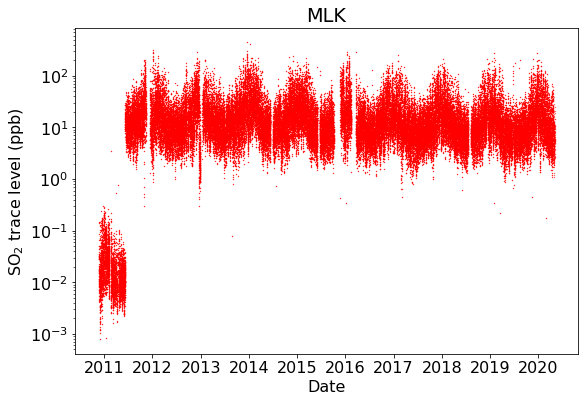

In [0]:
MLK_SO2 = airdata[(airdata['STA_StationName'] == 'Martin Luther King') & \
                    (airdata['MOT_MonitorName'] == 'NOX')]

plt.figure(figsize=(9,6))
plt.semilogy(MLK_SO2['Date_Time'], MLK_SO2['ParamValue'], 'r.', markersize=0.5)
plt.xlabel('Date')
plt.ylabel(r"SO$_2$ trace level (ppb)")
plt.title('MLK')

Text(0.5, 1.0, 'Brandywine Creek State Park')

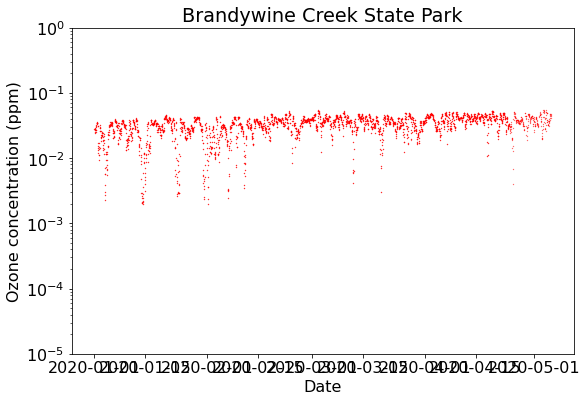

In [0]:
Brandywine_ozone = airdata[(airdata['STA_StationName'] == 'Brandywine Creek State Park') & \
                    (airdata['MOT_MonitorName'] == 'Ozone') & (airdata['Date_Time'] >= Jan1_2020)]

plt.figure(figsize=(9,6))
plt.semilogy(Brandywine_ozone['Date_Time'], Brandywine_ozone['ParamValue'], 'r.', markersize=0.5)
plt.ylim([1e-5,1])
plt.xlabel('Date')
plt.ylabel('Ozone concentration (ppm)')
plt.title('Brandywine Creek State Park')

In [0]:
airdata[(airdata['Date_Time'] >= Jan1_2020)]

,Date_Time,CountyCode,STA_StationName,MOT_AIR_ParamCode,MOT_MonitorName,ParamValue,STT_DataStatusCodeText
3628183,2020-01-02 18:00:00,5,Lewes,62201,RH,49.689170,_
3634151,2020-01-02 16:00:00,5,Lewes,44201,Ozone,0.040032,_
3634501,2020-01-01 00:00:00,3,Martin Luther King,42401,SO2 Trace Level,0.137756,_
3634502,2020-01-01 00:00:00,3,Martin Luther King,42101,CO Trace Level,0.118979,_
3634503,2020-01-01 00:00:00,3,Martin Luther King,62201,RH,51.854070,_
...,...,...,...,...,...,...,...
7525119,2020-05-05 18:00:00,5,Lewes,61104,Wind Dir V,128.587500,_
7525120,2020-05-05 18:00:00,5,Lewes,62201,RH,63.745280,_
7525121,2020-05-05 18:00:00,5,Lewes,62101,Temp,55.862780,_
7525122,2020-05-05 18:00:00,5,Lewes,42401,SO2 Trace Level,0.158468,_


In [0]:
Jan1_2020 = pd.to_datetime('01/01/2020')
ozone_2020 = airdata[(airdata['Date_Time'] >= Jan1_2020) & \
                    (airdata['MOT_MonitorName'] == 'Ozone')]

In [0]:
data_2020 = airdata[(airdata['Date_Time'] >= Jan1_2020)]

Text(0.5, 1.0, 'Brandywine Creek State Park')

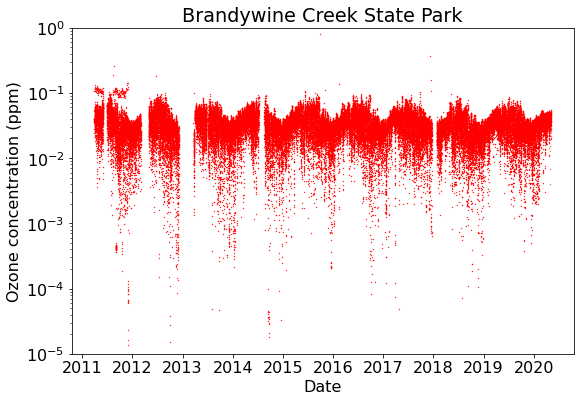

In [0]:
ozone_2020 = airdata[(airdata['Date_Time'] >= Jan1_2020) & \
                    (airdata['MOT_MonitorName'] == 'Ozone')]

plt.figure(figsize=(9,6))
plt.semilogy(Brandywine_ozone['Date_Time'], Brandywine_ozone['ParamValue'], 'r.', markersize=0.5)
plt.ylim([1e-5,1])
plt.xlabel('Date')
plt.ylabel('Ozone concentration (ppm)')
plt.title('Brandywine Creek State Park')

Text(0.5, 1.0, 'Martin Luther King_Ozone_since jan2020')

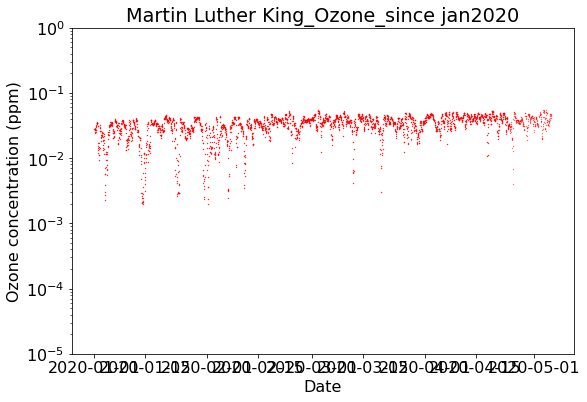

In [0]:
MLK_ozone = airdata[(airdata['STA_StationName'] == 'Martin Luther King') & \
                    (airdata['MOT_MonitorName'] == 'Ozone') & (airdata['Date_Time'] >= Feb1_2020)]

plt.figure(figsize=(9,6))
plt.semilogy(Brandywine_ozone['Date_Time'], Brandywine_ozone['ParamValue'], 'r.', markersize=0.5)
plt.ylim([1e-5,1])
plt.xlabel('Date')
plt.ylabel('Ozone concentration (ppm)')
plt.title('Martin Luther King_Ozone_since jan2020')

Text(0.5, 1.0, 'Martin Luther King_Ozone_since jan2020')

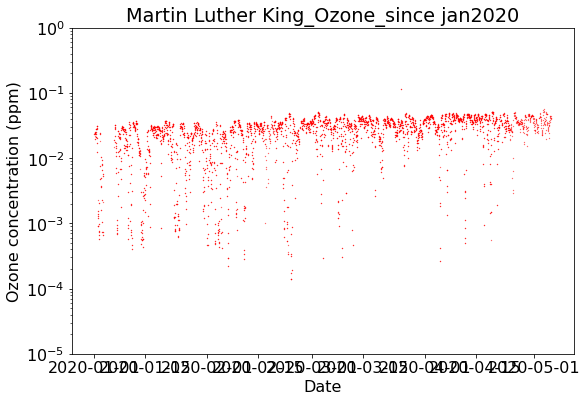

In [0]:
MLK_ozone = airdata[(airdata['STA_StationName'] == 'Martin Luther King') & \
                    (airdata['MOT_MonitorName'] == 'Ozone') & (airdata['Date_Time'] >= Jan1_2020)]

plt.figure(figsize=(9,6))
plt.semilogy(MLK_ozone['Date_Time'], MLK_ozone['ParamValue'], 'r.', markersize=0.5)
plt.ylim([1e-5,1])
plt.xlabel('Date')
plt.ylabel('Ozone concentration (ppm)')
plt.title('Martin Luther King_Ozone_since jan2020')

In [0]:
Feb1_2020 = pd.to_datetime('02/01/2020')

Text(0.5, 1.0, 'Lewes_since jan2020')

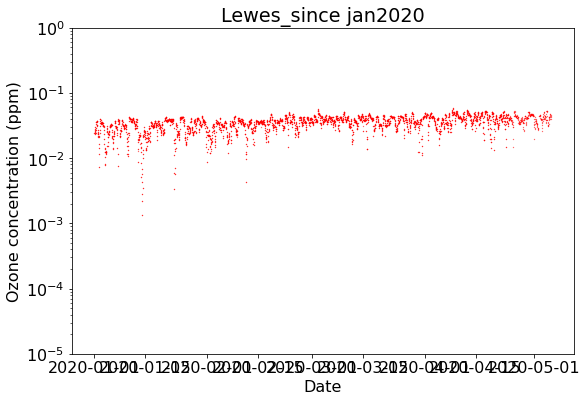

In [0]:
Lewes_ozone = airdata[(airdata['STA_StationName'] == 'Lewes') & \
                    (airdata['MOT_MonitorName'] == 'Ozone') & (airdata['Date_Time'] >= Jan1_2020)]

plt.figure(figsize=(9,6))
plt.semilogy(Lewes_ozone['Date_Time'], Lewes_ozone['ParamValue'], 'r.', markersize=0.5)
plt.ylim([1e-5,1])
plt.xlabel('Date')
plt.ylabel('Ozone concentration (ppm)')
plt.title('Lewes_since jan2020')

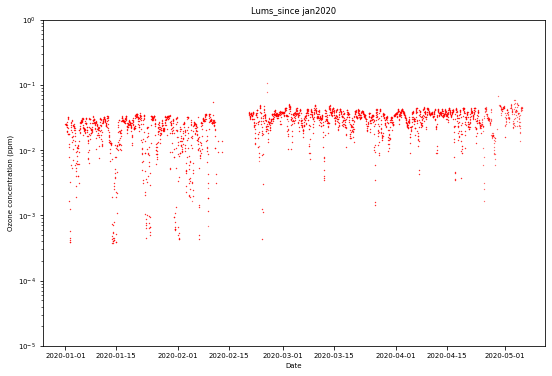

In [0]:
from matplotlib import pyplot as pyplot
Lums_ozone = airdata[(airdata['STA_StationName'] == 'Lums Pond State Park') & \
                    (airdata['MOT_MonitorName'] == 'Ozone') & (airdata['Date_Time'] >= Jan1_2020)]

plt.figure(figsize=(9,6))
plt.semilogy(Lums_ozone['Date_Time'], Lums_ozone['ParamValue'], 'r.', markersize=0.5)
plt.ylim([1e-5,1])
plt.xlabel('Date')
plt.ylabel('Ozone concentration (ppm)')
plt.title('Lums_since jan2020')
matplotlib.rcParams.update({'font.size': 7})
plt.savefig('foo.png')

NameError: ignored

In [0]:
from matplotlib import pyplot as pyplot
plt.savefig('foo.png')

<Figure size 432x288 with 0 Axes>

In [0]:
airdata(by='Date_Time', ascending=True)

TypeError: ignored

SO2 plot for MLK, Lewes, lums

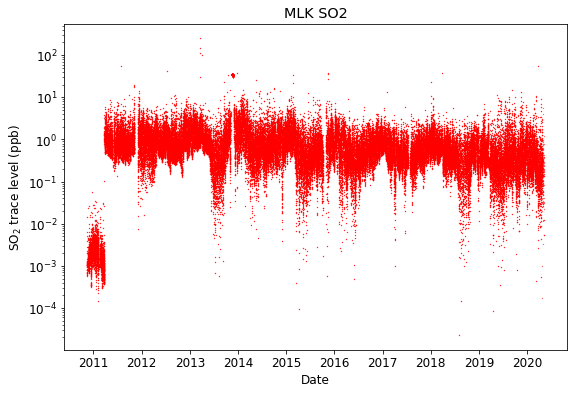

In [0]:
MLK_SO2 = airdata[(airdata['STA_StationName'] == 'Martin Luther King') & \
                    (airdata['MOT_MonitorName'] == 'SO2 Trace Level')]

plt.figure(figsize=(9,6))
plt.semilogy(MLK_SO2['Date_Time'], MLK_SO2['ParamValue'], 'r.', markersize=0.5)
plt.xlabel('Date')
plt.ylabel(r"SO$_2$ trace level (ppb)")
plt.title('MLK SO2')
matplotlib.rcParams.update({'font.size': 13})

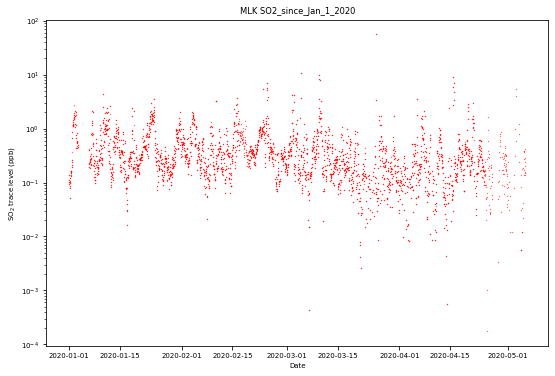

In [0]:
MLK_SO2 = airdata[(airdata['STA_StationName'] == 'Martin Luther King') & \
                    (airdata['MOT_MonitorName'] == 'SO2 Trace Level') & (airdata['Date_Time'] >= Jan1_2020)]

plt.figure(figsize=(9,6))
plt.semilogy(MLK_SO2['Date_Time'], MLK_SO2['ParamValue'], 'r.', markersize=0.5)
plt.xlabel('Date')
plt.ylabel(r"SO$_2$ trace level (ppb)")
plt.title('MLK SO2_since_Jan_1_2020')
matplotlib.rcParams.update({'font.size': 6})

Text(0.5, 1.0, 'Lewes_SO2_since_jan_2020')

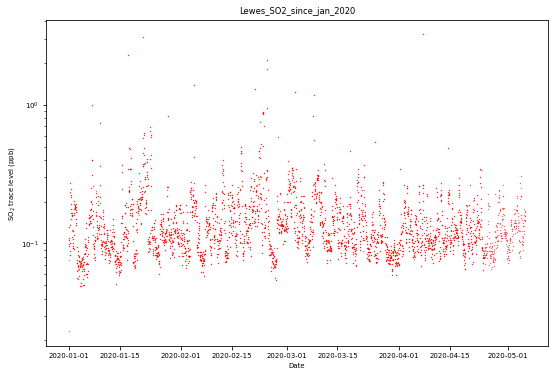

In [0]:
Lewes_SO2 = airdata[(airdata['STA_StationName'] == 'Lewes') & \
                    (airdata['MOT_MonitorName'] == 'SO2 Trace Level') & (airdata['Date_Time'] >= Jan1_2020)]

plt.figure(figsize=(9,6))
plt.semilogy(Lewes_SO2['Date_Time'], Lewes_SO2['ParamValue'], 'r.', markersize=0.5)
plt.xlabel('Date')
plt.ylabel(r"SO$_2$ trace level (ppb)")
plt.title('Lewes_SO2_since_jan_2020')

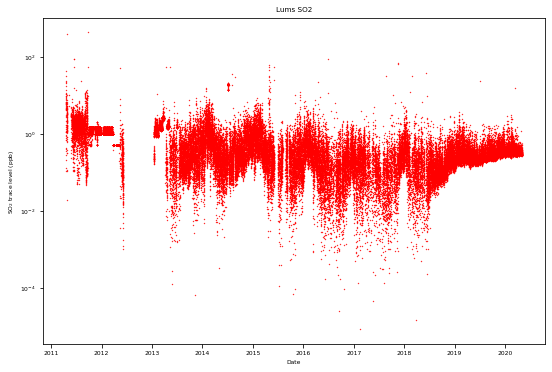

In [0]:
Lums_SO2 = airdata[(airdata['STA_StationName'] == 'Lums Pond State Park') & \
                    (airdata['MOT_MonitorName'] == 'SO2 Trace Level')]

plt.figure(figsize=(9,6))
plt.semilogy(Lums_SO2['Date_Time'], Lums_SO2['ParamValue'], 'r.', markersize=0.5)
plt.xlabel('Date')
plt.ylabel(r"SO$_2$ trace level (ppb)")
plt.title('Lums SO2')
matplotlib.rcParams.update({'font.size': 6})

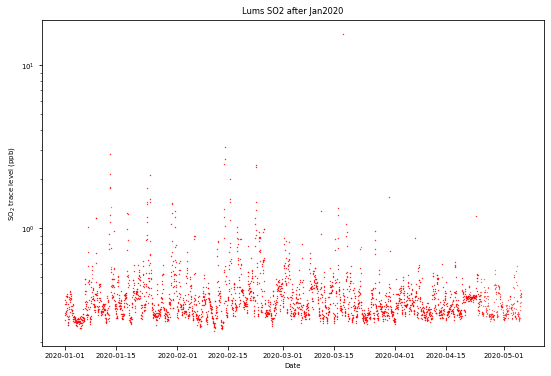

In [0]:
Lums_SO2 = airdata[(airdata['STA_StationName'] == 'Lums Pond State Park') & \
                    (airdata['MOT_MonitorName'] == 'SO2 Trace Level') & (airdata['Date_Time'] >= Jan1_2020)]

plt.figure(figsize=(9,6))
plt.semilogy(Lums_SO2['Date_Time'], Lums_SO2['ParamValue'], 'r.', markersize=0.5)
plt.xlabel('Date')
plt.ylabel(r"SO$_2$ trace level (ppb)")
plt.title('Lums SO2 after Jan2020')
matplotlib.rcParams.update({'font.size': 6})

In [0]:
airdata

,Date_Time,CountyCode,STA_StationName,MOT_AIR_ParamCode,MOT_MonitorName,ParamValue,STT_DataStatusCodeText
0,2010-11-15 17:00:00,3,Martin Luther King,42401,SO2 Trace Level,0.006407,_
1,2010-11-15 17:00:00,3,Martin Luther King,42101,CO Trace Level,0.435146,_
2,2010-11-15 17:00:00,3,Martin Luther King,62101,Temp,12.394440,_
3,2010-11-15 17:00:00,3,Martin Luther King,42603,NOX,0.000000,RS232
4,2010-11-15 17:00:00,3,Martin Luther King,44201,Ozone,0.001832,_
...,...,...,...,...,...,...,...
7525119,2020-05-05 18:00:00,5,Lewes,61104,Wind Dir V,128.587500,_
7525120,2020-05-05 18:00:00,5,Lewes,62201,RH,63.745280,_
7525121,2020-05-05 18:00:00,5,Lewes,62101,Temp,55.862780,_
7525122,2020-05-05 18:00:00,5,Lewes,42401,SO2 Trace Level,0.158468,_


In [0]:
# -- get a subset of the columns
cols = ["Date_Time", "MOT_MonitorName", "ParamValue"]
ind = airdata["STA_StationName"] == "Lewes"
sub = airdata[ind]
sub = sub[cols].copy()

In [0]:
sub

,Date_Time,MOT_MonitorName,ParamValue
2999793,2011-04-23 08:00:00,Ozone,0.040527
2999866,2011-05-05 02:00:00,Ozone,0.100242
3000206,2011-05-09 07:00:00,Ozone,0.030443
3000348,2011-05-21 01:00:00,Ozone,0.101712
3000420,2011-05-23 03:00:00,Ozone,0.043366
...,...,...,...
7525119,2020-05-05 18:00:00,Wind Dir V,128.587500
7525120,2020-05-05 18:00:00,RH,63.745280
7525121,2020-05-05 18:00:00,Temp,55.862780
7525122,2020-05-05 18:00:00,SO2 Trace Level,0.158468


In [0]:
sub.groupby(["Date_Time", "MOT_MonitorName"]).mean().unstack("MOT_MonitorName")["ParamValue"]

MOT_MonitorName,NO2,NOX,Ozone,RH,SO2 Trace Level,SO2-Max5min,Temp,Wind Dir V,Wind Speed V
Date_Time,,,,,,,,,
2011-04-14 02:00:00,NaN,NaN,0.025313,NaN,NaN,NaN,NaN,286.95070,6.016528
2011-04-14 03:00:00,NaN,NaN,0.025313,NaN,NaN,NaN,NaN,290.41220,5.376528
2011-04-14 04:00:00,NaN,NaN,0.025949,NaN,NaN,NaN,NaN,291.88280,5.708472
2011-04-14 05:00:00,NaN,NaN,0.027633,NaN,NaN,NaN,NaN,287.47360,5.081250
2011-04-14 06:00:00,NaN,NaN,0.026659,NaN,NaN,NaN,NaN,288.21100,4.479861
...,...,...,...,...,...,...,...,...,...
2020-05-05 14:00:00,NaN,NaN,0.047206,50.40417,0.157734,0.157734,55.91389,63.10556,2.970556
2020-05-05 15:00:00,NaN,NaN,0.046035,43.63889,0.146641,0.146641,58.81055,160.20140,2.954583
2020-05-05 16:00:00,NaN,NaN,0.044074,50.28097,0.170995,0.170995,58.57153,153.44440,4.599306


In [0]:
data_2020

,Date_Time,CountyCode,STA_StationName,MOT_AIR_ParamCode,MOT_MonitorName,ParamValue,STT_DataStatusCodeText
3628183,2020-01-02 18:00:00,5,Lewes,62201,RH,49.689170,_
3634151,2020-01-02 16:00:00,5,Lewes,44201,Ozone,0.040032,_
3634501,2020-01-01 00:00:00,3,Martin Luther King,42401,SO2 Trace Level,0.137756,_
3634502,2020-01-01 00:00:00,3,Martin Luther King,42101,CO Trace Level,0.118979,_
3634503,2020-01-01 00:00:00,3,Martin Luther King,62201,RH,51.854070,_
...,...,...,...,...,...,...,...
7525119,2020-05-05 18:00:00,5,Lewes,61104,Wind Dir V,128.587500,_
7525120,2020-05-05 18:00:00,5,Lewes,62201,RH,63.745280,_
7525121,2020-05-05 18:00:00,5,Lewes,62101,Temp,55.862780,_
7525122,2020-05-05 18:00:00,5,Lewes,42401,SO2 Trace Level,0.158468,_


In [0]:
# -- get a subset of the columns
cols = ["Date_Time", "MOT_MonitorName", "ParamValue"]
ind = data_2020["STA_StationName"] == "Lewes"
sub_2020 = data_2020[ind]
sub_2020 = sub[cols].copy()

In [0]:
sub_2020

,Date_Time,MOT_MonitorName,ParamValue
3628183,2020-01-02 18:00:00,RH,49.689170
3634151,2020-01-02 16:00:00,Ozone,0.040032
3634544,2020-01-01 00:00:00,Ozone,0.023930
3634545,2020-01-01 00:00:00,Wind Speed V,4.711389
3634546,2020-01-01 00:00:00,Wind Dir V,298.440300
...,...,...,...
7525119,2020-05-05 18:00:00,Wind Dir V,128.587500
7525120,2020-05-05 18:00:00,RH,63.745280
7525121,2020-05-05 18:00:00,Temp,55.862780
7525122,2020-05-05 18:00:00,SO2 Trace Level,0.158468


In [0]:
Lewes_2020_Groupby_TimexMonitor = sub_2020.groupby(["Date_Time", "MOT_MonitorName"]).mean().unstack("MOT_MonitorName")["ParamValue"]

In [0]:
Lewes_2020_Groupby_TimexMonitor

MOT_MonitorName,Ozone,RH,SO2 Trace Level,SO2-Max5min,Temp,Wind Dir V,Wind Speed V
Date_Time,,,,,,,
2020-01-01 00:00:00,0.023930,65.17778,0.049790,0.076247,43.89278,298.44030,4.711389
2020-01-01 01:00:00,0.027903,57.86833,0.099670,0.119581,42.50611,302.20140,5.578472
2020-01-01 02:00:00,0.025447,62.08000,0.096270,0.129110,40.30333,279.51530,2.737361
2020-01-01 03:00:00,0.024667,62.10444,0.106022,0.125922,39.52945,289.89310,2.921528
2020-01-01 04:00:00,0.023300,64.79195,0.109555,0.136695,38.35569,287.51110,2.982361
...,...,...,...,...,...,...,...
2020-05-05 14:00:00,0.047206,50.40417,0.157734,0.157734,55.91389,63.10556,2.970556
2020-05-05 15:00:00,0.046035,43.63889,0.146641,0.146641,58.81055,160.20140,2.954583
2020-05-05 16:00:00,0.044074,50.28097,0.170995,0.170995,58.57153,153.44440,4.599306


In [0]:
t = "Date_Time"

In [0]:
df = ["SO2 Trace Level"]

In [0]:
x

'SO2 Trace Level'

In [0]:
d_mva = 

In [0]:
Jan2015_to_Apr2015 = pd.date_range(start ='01/01/2015', end='30/04/2015')

In [0]:
data_2015 =  airdata[(airdata['Date_Time'] >= '01/01/2015') & (airdata['Date_Time']<='30/04/2015')]

In [0]:
print(Jan2015_to_Apr2015)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2015-04-21', '2015-04-22', '2015-04-23', '2015-04-24',
               '2015-04-25', '2015-04-26', '2015-04-27', '2015-04-28',
               '2015-04-29', '2015-04-30'],
              dtype='datetime64[ns]', length=120, freq='D')


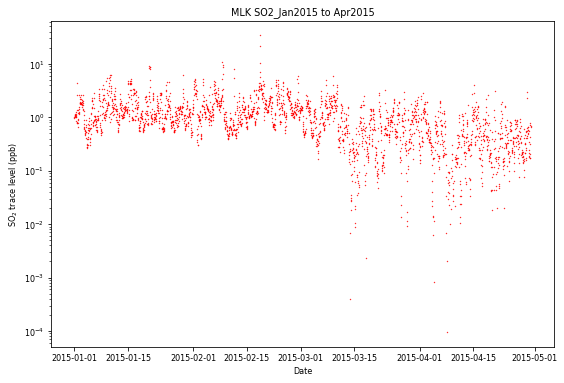

In [0]:
MLK_SO2 = data_2015[(data_2015['STA_StationName'] == 'Martin Luther King') & \
                    (data_2015['MOT_MonitorName'] == 'SO2 Trace Level') ]

plt.figure(figsize=(9,6))
plt.semilogy(MLK_SO2['Date_Time'], MLK_SO2['ParamValue'], 'r.', markersize=0.5)
plt.xlabel('Date')
plt.ylabel(r"SO$_2$ trace level (ppb)")
plt.title('MLK SO2_Jan2015 to Apr2015')
matplotlib.rcParams.update({'font.size': 7})

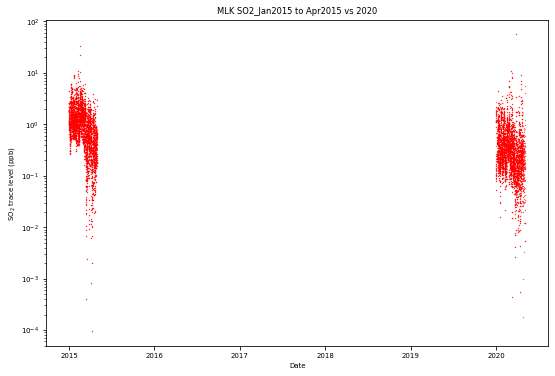

In [0]:
MLK_SO2_2015 = data_2015[(data_2015['STA_StationName'] == 'Martin Luther King') & \
                    (data_2015['MOT_MonitorName'] == 'SO2 Trace Level') ]

MLK_SO2_2020 = airdata[(airdata['STA_StationName'] == 'Martin Luther King') & \
                    (airdata['MOT_MonitorName'] == 'SO2 Trace Level') & (airdata['Date_Time'] >= Jan1_2020)]

plt.figure(figsize=(9,6))
plt.semilogy(MLK_SO2_2015['Date_Time'], MLK_SO2_2015['ParamValue'], 'r.', markersize=0.5)
plt.semilogy(MLK_SO2_2020['Date_Time'], MLK_SO2_2020['ParamValue'], 'r.', markersize=0.5)
plt.xlabel('Date')
plt.ylabel(r"SO$_2$ trace level (ppb)")
plt.title('MLK SO2_Jan2015 to Apr2015 vs 2020')


Beginning of the prodution of a rolling average graph

In [0]:
# -- get a subset of the columns
cols = ["Date_Time", "MOT_MonitorName", "ParamValue"]
ind = data_2020["STA_StationName"] == "Lewes"
sub_2020 = data_2020[ind]
sub_2020 = sub[cols].copy()

In [0]:
# -- generate pivot table
subg = sub.groupby(["Date_Time", "MOT_MonitorName"]).mean().unstack("MOT_MonitorName")["ParamValue"]
subg.columns.name = None

In [0]:
# -- resample
subg_samp = subg.resample("H").mean()

In [0]:
# -- apply 24hr rolling mean
subg_roll = subg_samp.rolling(24).mean()

In [0]:
subg_roll

,Ozone,RH,SO2 Trace Level,SO2-Max5min,Temp,Wind Dir V,Wind Speed V
Date_Time,,,,,,,
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2020-05-05 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-05 15:00:00,0.040092,46.893149,0.129639,0.129639,57.465215,241.599420,7.271753
2020-05-05 16:00:00,0.039823,47.576355,0.130124,0.130124,56.892026,234.784662,6.986481


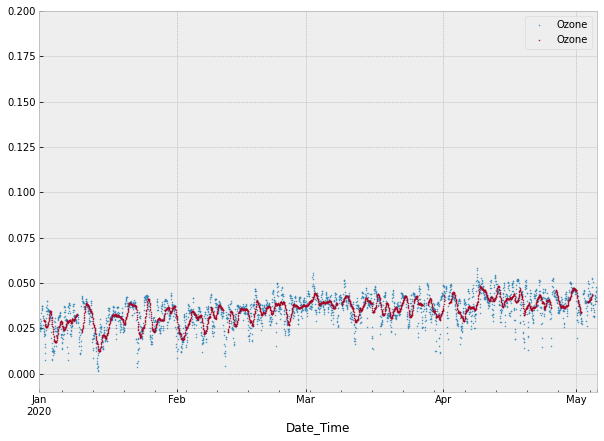

In [0]:
# -- plot example
fig, ax = plt.subplots()
subg_samp.plot(y="Ozone", use_index=True, ylim=[-0.01, 0.2], marker=".", ms=1, lw=0, ax=ax)
subg_roll.plot(y="Ozone", use_index=True, ylim=[-0.01, 0.2], marker=".", ms=1, lw=0, ax=ax)
matplotlib.rcParams.update({'font.size': 10})

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 7)
plt.style.use("bmh")

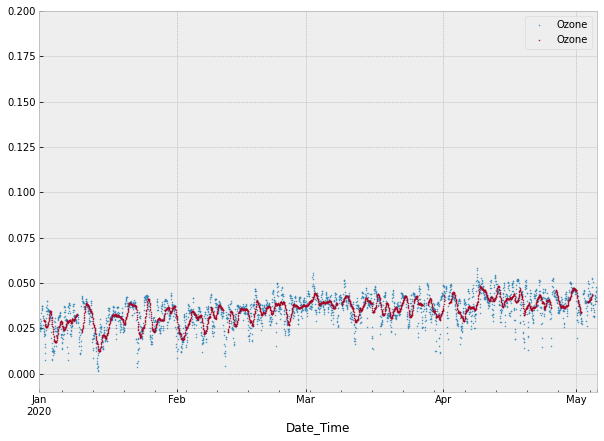

In [0]:
fig, ax = plt.subplots()
subg_samp.plot(y="Ozone", use_index=True, ylim=[-0.01, 0.2], marker=".", ms=1, lw=0, ax=ax)
subg_roll.plot(y="Ozone", use_index=True, ylim=[-0.01, 0.2], marker=".", ms=1, lw=0, ax=ax)

In [0]:
# -- apply weekly (24 hr * 7 days) rolling mean
subg_rollw = subg_samp.rolling(24 * 7).mean()

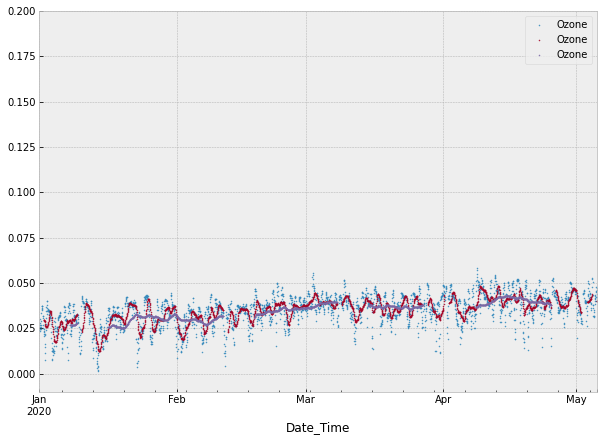

In [0]:
# -- plot example
fig, ax = plt.subplots()
subg_samp.plot(y="Ozone", use_index=True, ylim=[-0.01, 0.2], marker=".", ms=1, lw=0, ax=ax)
subg_roll.plot(y="Ozone", use_index=True, ylim=[-0.01, 0.2], marker=".", ms=1, lw=0, ax=ax)
subg_rollw.plot(y="Ozone", use_index=True, ylim=[-0.01, 0.2], marker=".", ms=1, lw=0, ax=ax)

In [0]:
cols = ["Date_Time", "MOT_MonitorName", "ParamValue"]
ind = airdata["STA_StationName"] == "Martin Luther King"
sub = airdata[ind]
sub = sub[cols].copy()

In [0]:
subg = sub.groupby(["Date_Time", "MOT_MonitorName"]).mean().unstack("MOT_MonitorName")["ParamValue"]
subg.columns.name = None

In [0]:
subg_samp = subg.resample("H").mean()

In [0]:
subg_roll = subg_samp.rolling(100).mean()

In [0]:
subg_roll

,AQS Temp Deg C,BC,CO Trace Level,NO2,NOX,NOY,Ozone,PM 2.5 TAPI,PM2.5 5030i IN,PM2.5 Sharp Colo,RH,SO2 Trace Level,SO2-Max5min,Temp,Wind Dir V,Wind Speed V
Date_Time,,,,,,,,,,,,,,,,
2010-11-15 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-15 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-15 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-15 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-15 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-05 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-05 15:00:00,13.814666,NaN,0.175936,5.046327,7.458132,7.437458,0.033830,4.950393,NaN,NaN,37.787407,0.113187,NaN,55.790355,305.370471,6.802126
2020-05-05 16:00:00,13.604571,NaN,0.178010,5.210616,7.636306,7.632222,0.034084,5.187049,NaN,NaN,37.727708,0.119127,NaN,55.412183,304.436563,6.538737


Rolling average Graph for SO2 levels in MLK street in Wilmington, DE. As you can see ther last few says there seems to be a dip. Of course this is just a bias visual interprertaion that needs more analysis

Text(0, 0.5, 'SO2 Trace Levels (unit??)')

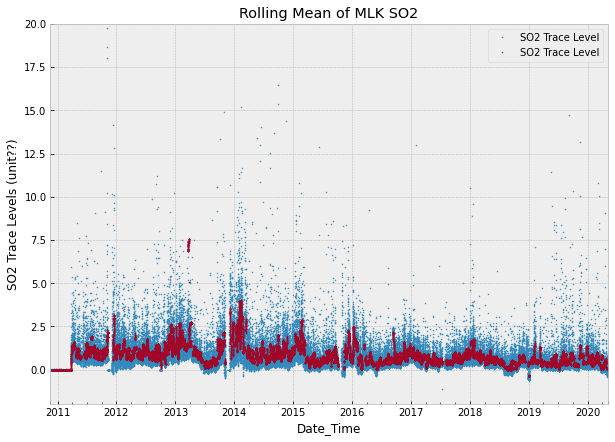

In [0]:
fig, ax = plt.subplots()
subg_samp.plot(y="SO2 Trace Level", use_index=True, ylim=[-2, 20], marker=".", ms=1, lw=0, ax=ax)
subg_roll.plot(y="SO2 Trace Level", use_index=True, ylim=[-2, 20], marker=".", ms=1, lw=0, ax=ax)
plt.title ('Rolling Mean of MLK SO2')
plt.ylabel ('SO2 Trace Levels (unit??)')

Increasing the rolling window

In [0]:
subg_rollw = subg_samp.rolling(100).mean()




Text(0, 0.5, 'SO2 Trace Levels (unit??)')

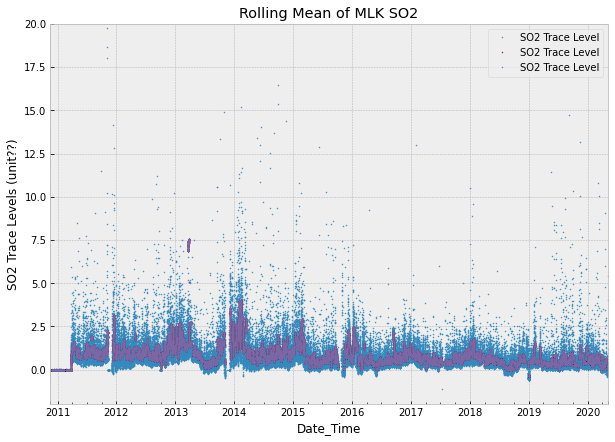

In [0]:
fig, ax = plt.subplots()
subg_samp.plot(y="SO2 Trace Level", use_index=True, ylim=[-2, 20], marker=".", ms=1, lw=0, ax=ax)
subg_roll.plot(y="SO2 Trace Level", use_index=True, ylim=[-2, 20], marker=".", ms=1, lw=0, ax=ax)
subg_rollw.plot(y="SO2 Trace Level", use_index=True, ylim=[-2, 20], marker=".", ms=1, lw=0, ax=ax)
plt.title ('Rolling Mean of MLK SO2')
plt.ylabel ('SO2 Trace Levels (unit??)')

In [0]:
cols = ["Date_Time", "MOT_MonitorName", "ParamValue"]
ind = airdata["STA_StationName"] == "Lewes"
sub = airdata[ind]
sub = sub[cols].copy()


In [0]:
subg = sub.groupby(["Date_Time", "MOT_MonitorName"]).mean().unstack("MOT_MonitorName")["ParamValue"]
subg.columns.name = None

In [0]:
subg_samp = subg.resample("H").mean()

In [0]:
subg_roll = subg_samp.rolling(24).mean()

In [0]:
subg_roll

,NO2,NOX,Ozone,RH,SO2 Trace Level,SO2-Max5min,Temp,Wind Dir V,Wind Speed V
Date_Time,,,,,,,,,
2011-04-14 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-14 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-14 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-14 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-14 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-05-05 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-05 15:00:00,NaN,NaN,0.040092,46.893149,0.129639,0.129639,57.465215,241.599420,7.271753
2020-05-05 16:00:00,NaN,NaN,0.039823,47.576355,0.130124,0.130124,56.892026,234.784662,6.986481


Rolling average for SO2 data in Lewes, DE

Text(0, 0.5, 'SO2 Trace Levels (unit??)')

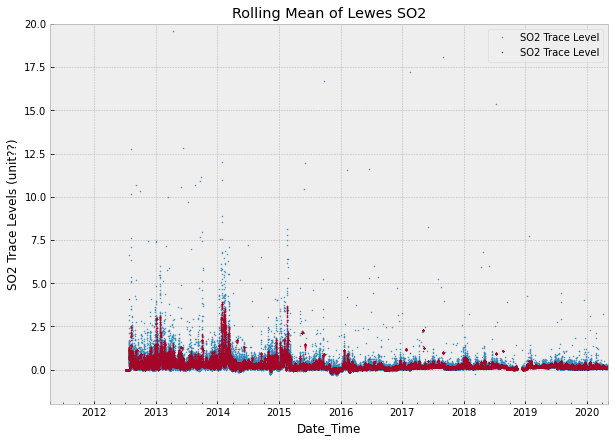

In [0]:
fig, ax = plt.subplots()
subg_samp.plot(y="SO2 Trace Level", use_index=True, ylim=[-2, 20], marker=".", ms=1, lw=0, ax=ax)
subg_roll.plot(y="SO2 Trace Level", use_index=True, ylim=[-2, 20], marker=".", ms=1, lw=0, ax=ax)
plt.title ('Rolling Mean of Lewes SO2')
plt.ylabel ('SO2 Trace Levels (unit??)')

Increased rolling window

In [0]:
subg_rollw = subg_samp.rolling(24 * 7).mean()

Text(0, 0.5, 'SO2 Trace Levels (unit??)')

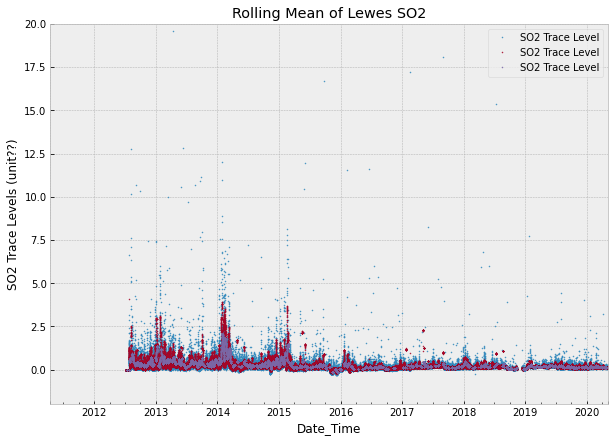

In [0]:
fig, ax = plt.subplots()
subg_samp.plot(y="SO2 Trace Level", use_index=True, ylim=[-2, 20], marker=".", ms=1, lw=0, ax=ax)
subg_roll.plot(y="SO2 Trace Level", use_index=True, ylim=[-2, 20], marker=".", ms=1, lw=0, ax=ax)
subg_rollw.plot(y="SO2 Trace Level", use_index=True, ylim=[-2, 20], marker=".", ms=1, lw=0, ax=ax)
plt.title ('Rolling Mean of Lewes SO2')
plt.ylabel ('SO2 Trace Levels (unit??)')

From Helga Huntley in our team


> Folks from the Delaware Environmental Observing System (DEOS), who operate the state’s network of weather stations, are under the impression that DNREC only performs regular maintenance and calibration on the air quality monitoring equipment at the MLK site.  Most of the others produce questionable data.  Just sharing for those who may want to look further into this dataset.

Data from other sites like Lewes is not as reliable. Looking at MLK data only would be the future direction I would go to analyze this data.

Looking at MLK rolling averges, primarily there looks like a visual dip in SO2 levels.

Further analysis is needed to understand this.
